In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader , Dataset 

import matplotlib.pyplot as plt
from cfg import *
torch.manual_seed(6666)



use constantpad2d() to resize 

In [26]:
import cv2
import torchvision.transforms as T 
from torchvision.transforms.functional import hflip , vflip

class Total_dataset(Dataset):
    def __init__(self, inputs: list, targets: list, transform=None) -> None:
        super().__init__()
        self.inputs = inputs
        self.targets = targets
        self.transform = transform
    
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self , index : int  , transform = None):
        #是否有辦法用path + file name取用data
        input_img = self.inputs[index]
        target_img = self.targets[index]
        
        x_data , y_data = cv2.imread(input_img) , cv2.imread(target_img)
        
        print(x_data.shape)
        print(y_data.shape)
        
        
        #resize
        if x_data.shape != (512 , 512 , 3) :
            x_data = cv2.resize(x_data , (512 , 512))
        if y_data.shape != (512 , 512 , 3) :
            y_data = cv2.resize(y_data , (512 ,512))

        # turn to torch (typecasting)

        #data augmentaion if true
        if self.transform != None : 
            #x_data , y_data = self.transform(x_data , y_data)
            for t in self.transform :
                if t == "T.Normalize([1 , 1 , 1] , [1 , 1 , 1])" :
                    """
                    x y mean0 tensor(0.2302) tensor(0.0111)
                    x y mean1 tensor(0.1842) tensor(0.0111)
                    x y mean2 tensor(0.1870) tensor(0.0111)
                    x y std0 tensor(0.2334) tensor(0.0737)
                    x y std01 tensor(0.1999) tensor(0.0737)
                    x y std2 tensor(0.1987) tensor(0.0737)
                    """
                    #normalized with whole dataset mean and std (not batchwise)
                    img_normalize = T.Normalize([0.2302 , 0.1842 , 0.1870] , [0.2334 , 0.1999 , 0.1987])
                    x_data = img_normalize(x_data)
                    label_normalize = T.Normalize([0.0111 , 0.0111 , 0.0111 ] , [0.0737 , 0.0737 , 0.0737]) 
                    y_data = label_normalize(y_data)
                elif t == "T.RandomHorizontalFlip(p=1)" :
                    if torch.rand(1)< 0.5 :
                        x_data = hflip(x_data)
                        y_data = hflip(y_data)
                        print("fuck2021")
                elif t == "T.RandomVerticalFlip(p=1)" :
                    if torch.rand(1)< 0.5 :
                        x_data = vflip(x_data)
                        y_data = vflip(y_data)
                        print("fuck2022")

                elif t == "T.RandomRotation(degrees=(360 , 360))" : 
                    if torch.rand(1)< 0.5 :
                        angle = int(torch.rand(1)*360)
                        rotate_funct = T.RandomRotation(degrees=(angle, angle))
                        x_data = rotate_funct(x_data)
                        y_data = rotate_funct(y_data)
                        print("fuck2023")

                else :
                    x_data = t(x_data)
                    y_data =t(y_data)
                
        #x_data, y_data = torch.from_numpy(x_data).type(torch.float32), torch.from_numpy(y_data).type(torch.float32)
        x_data = torch.permute(x_data , (1, 2 , 0))
        y_data = torch.permute(y_data , (1 , 2 , 0))
        print("!!!!!!!!!!!!!!!!!!!!!!" , y_data.shape)
        y_data = y_data[: , : , 2] #edit to the last channel
        y_data = np.expand_dims( y_data, axis= -1) #(512 512) -> (512 512 1)
        return x_data , y_data  #torch

        #torch or numpy to chose

        
        
    
        


In [3]:
import os

non_name_set = set()
PR_name_set = set()
name_set = set()
total_data_path = [non_T1C_data , non_T1_data , non_Flair_data , non_T2_data , PR_T1C_data , PR_T1_data , PR_Flair_data  , PR_T2_data]
count1 = 0
for folder_name in total_data_path :
    for name in os.listdir(folder_name) :
        name = name.strip('.jpg').strip('.json')
        if name == 'ipynb_checkpoint' :
            continue
        name_set.add(name)
        if count1 <= 3 :
            non_name_set.add(name)
        else :
            PR_name_set.add(name)
    count1 += 1
#print(name_set)


non_name_set2 = set()
PR_name_set2 = set()
name_set2 = set()
count2 = 0
total_target_path = [ non_T1C_target , non_T1_target , non_Flair_target  , non_T2_target , PR_T1C_target , PR_T1_target ,  PR_Flair_target , PR_T2_target ]
for folder_name2 in total_target_path :
    for name in os.listdir(folder_name2):
        name = name.strip('.png')
        if name == 'ipynb_checkpoint':
            continue
        name_set2.add(name)
        if count2 <= 3 :
            non_name_set2.add(name)
        else :
            PR_name_set2.add(name)
    count2 += 1
print(name_set2)


#same patients set (make sure no mismatch)
if name_set2 == name_set :
    print('success')
"""print(len(name_set))
print(len(name_set2))
print(len(non_name_set))
print(len(PR_name_set))"""

    


{'31445157', '26608196', '15176128', '26658418', '17244854', '11775010', '28358688', '30920239', '18765851', '21381973', '12261283', '27607264', '29816081', '31406726', '33056266', '25825974', '19315335', '29177415', '15525495', '27237207', '20483981', '20947834', '26434694', '13661917', '24237245', '80190941', '27710844', '28267864', '27472711', '19425238', '27931321', '31046225', '21372392', '13488672', '21105320', '52847319', '15552568', '10027124', '29729120', '18456622', '31001430', '30268702', '30732894', '27103788', '28248060', '30517836', '11009708', '26082459', '30871154', '14041674', '29285707', '16113441', '22296689', '26073373', '29301889', '25385854'}
success


'print(len(name_set))\nprint(len(name_set2))\nprint(len(non_name_set))\nprint(len(PR_name_set))'

In [25]:
#same patient (same index)
total_data_list = []
total_target_list =[]  
for name in non_name_set :
    name1 = name + ".jpg"
    name2 = name + ".png"
    total_data_list.append(os.path.join(non_T1C_data , name1))
    total_data_list.append(os.path.join(non_T1_data , name1))
    total_data_list.append(os.path.join(non_Flair_data , name1))
    total_data_list.append(os.path.join(non_T2_data , name1))
    total_target_list.append(os.path.join(non_T1C_target , name2))
    total_target_list.append(os.path.join(non_T1_target , name2))
    total_target_list.append(os.path.join(non_Flair_target , name2))
    total_target_list.append(os.path.join(non_T2_target , name2)) 

for name in PR_name_set :
    name1 = name + ".jpg"
    name2 = name + ".png"
    total_data_list.append(os.path.join(PR_T1C_data , name1))
    total_data_list.append(os.path.join(PR_T1_data , name1))
    total_data_list.append(os.path.join(PR_Flair_data , name1))
    total_data_list.append(os.path.join(PR_T2_data , name1))
    total_target_list.append(os.path.join(PR_T1C_target , name2))
    total_target_list.append(os.path.join(PR_T1_target , name2))
    total_target_list.append(os.path.join(PR_Flair_target , name2))
    total_target_list.append(os.path.join(PR_T2_target , name2))   

train_data_list = total_data_list[0 : int(len(total_data_list)*0.8)] #80%data
train_target_list =  total_target_list[0 : int(len(total_target_list)*0.8) ] #80%target

test_data_list = total_data_list[int(len(total_data_list)*0.8) : len(total_data_list)] #20%data
test_target_list = total_target_list[int(len(total_target_list)*0.8) : len(total_target_list)] #20%target

#initial img visualize
"""count , count2 = 0 , 0
for img1 in total_data_list:
    img1 = cv2.imread(img1)
    print(type(img1))
    plt.imshow(img1)
    plt.show()
    print(img1.shape)
    count += 1
    if count > 5 : break
for img2 in total_target_list:
    img2 = cv2.imread(img2)
    print(type(img2))
    plt.imshow(img2)
    plt.show()
    print(img2.shape)
    count2 += 1
    if count2 > 5: break"""


#std and mean calculated
#total dataset
total_dataset = Total_dataset(total_data_list ,
                              total_target_list,
                              transform= [T.ToTensor()]
)
print(len(total_dataset))
total_dataloader = DataLoader(total_dataset , batch_size= len(total_dataset) , shuffle= False)
#total_dataloader = DataLoader(total_dataset , batch_size= len(total_data_list) , shuffle= False)

x , y = next(iter(total_dataloader))


#img visualize after to_tensor
"""for index in range(5) :
    #cv2.imshow(f"{index}.jpg" , x[index , : , : , :].detach().cpu().numpy())
    #cv2.imshow(f"{index}.png" , y[index , : , : , : ].detach().cpu().numpy())
    plt.imshow(x[index , : , : , :])
    plt.show()
    plt.imshow(y[index , : , : , :])
    plt.show()
"""


print("x y mean0" ,x[0].mean() , y[0].mean()) #ch1
print("x y mean1" ,x[1].mean() , y[1].mean()) #ch2
print("x y mean2" ,x[2].mean() , y[2].mean()) #ch3
print("x y std0" , x[0].std() , y[0].std()) #ch1
print("x y std01" , x[1].std() , y[1].std()) #ch2
print("x y std2" , x[2].std() , y[2].std() ) #ch3 

224
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(320, 320, 3)
(320, 320, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512,

# data augmentation
可能問題 :
    random transform data_x data_y 沒有對到(機率)
    
    目前label 全黑 (solve : take the last channel)
    permute 可能有問題 
    label根本沒對到tumor位置 (1 , 2 , 0) (2 , 1 , 0)不知道為啥整個圖轉掉
    transform完變全黑

In [58]:
print(torch.rand(1))

tensor([0.4516])


179
(512, 512, 3)
(512, 512, 3)
fuck2022
fuck2021
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
fuck2022
fuck2021
fuck2023
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
fuck2021
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
fuck2022
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
fuck2022
fuck2023
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(320, 290, 3)
(320, 290, 3)
fuck2022
fuck2021
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(320, 290, 3)
(320, 290, 3)
fuck2022
fuck2023
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512, 512, 3)
(512, 512, 3)
fuck2022
fuck2021
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(448, 406, 3)
(320, 290, 3)
fuck2023
!!!!!!!!!!!!!!!!!!!!!! torch.Size([512, 512, 3])
(512,

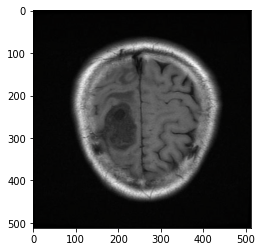

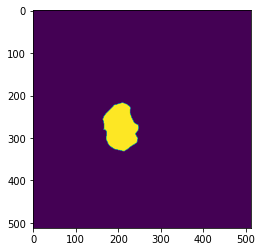

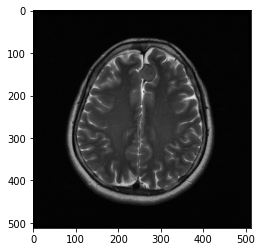

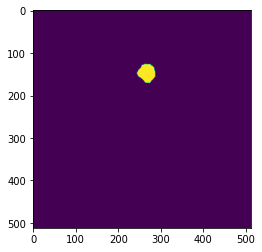

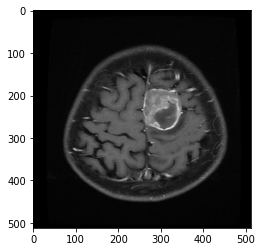

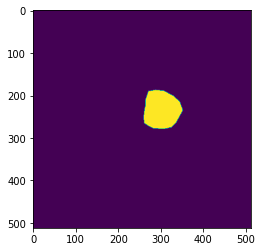

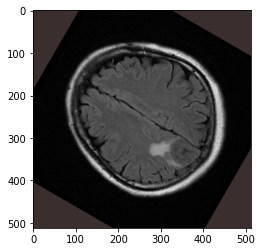

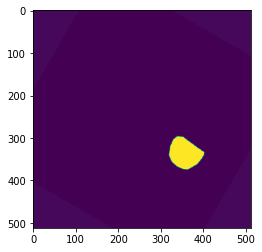

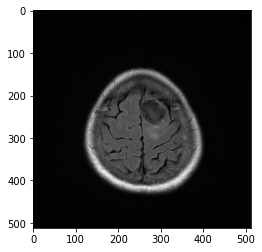

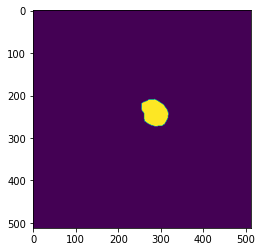

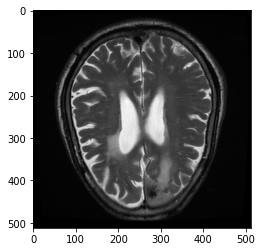

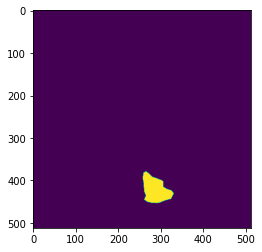

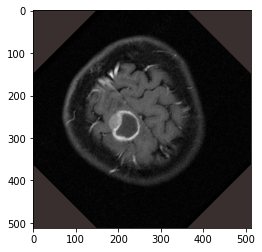

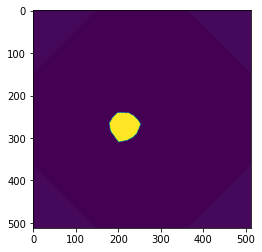

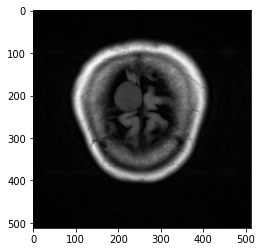

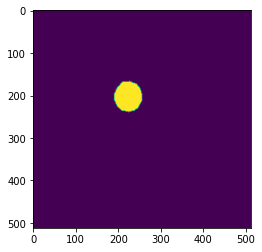

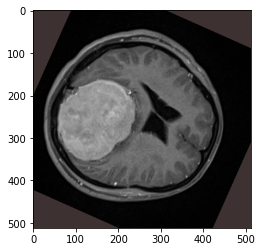

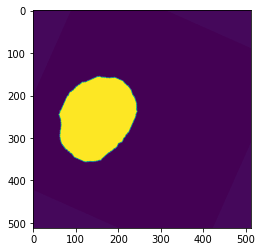

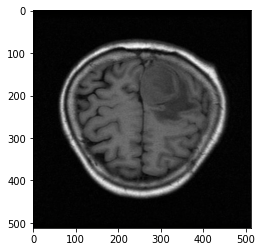

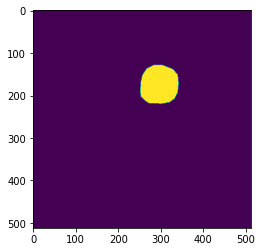

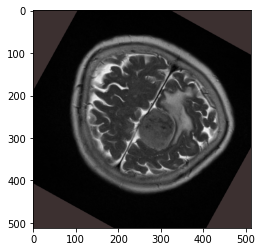

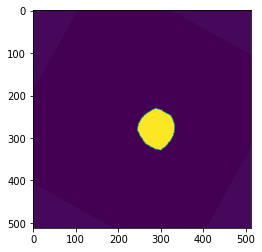

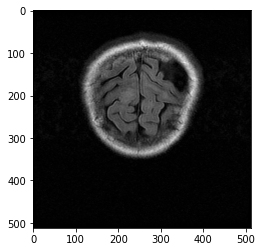

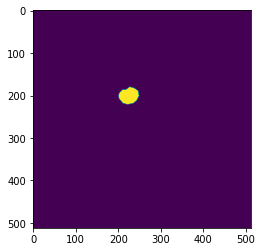

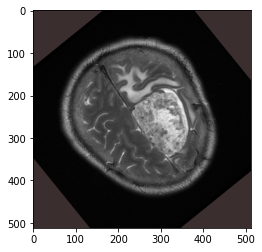

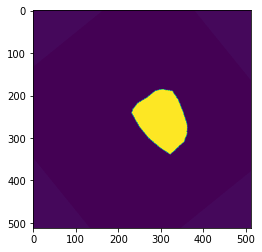

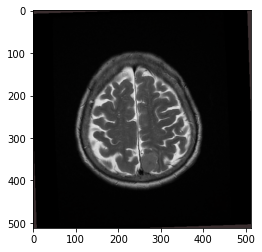

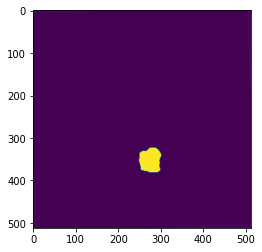

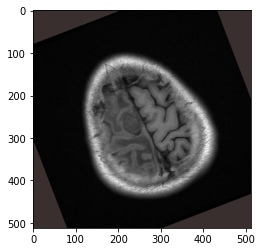

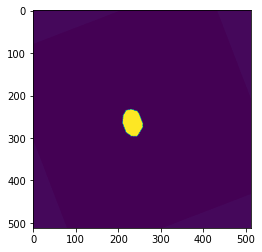

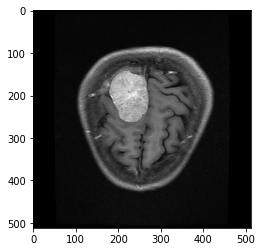

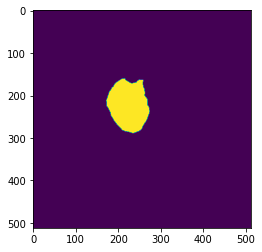

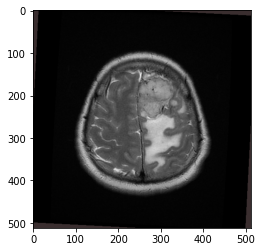

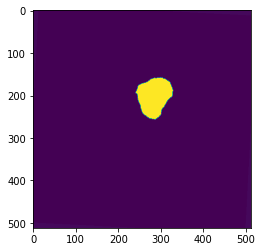

"total_train_img = train_x\ntotal_train_lbl = train_y\nbatch_count = 9\nfor i in range(batch_count) :\n    train_x, train_y = next(iter(training_dataloader))\n    total_train_img = torch.cat((total_train_img , train_x) , dim= 0)\n    total_train_lbl = torch.cat((total_train_lbl , train_y) , dim = 0)\nprint(total_train_img.shape)\nprint(total_train_lbl.shape)\n    \ntest_x , test_y = next(iter(testing_dataloader))\n\n\n#all img and label size is (512 , 512 , 3)\nprint(f'train_x = shape: {train_x.shape}; type: {train_x.dtype}')\nprint(train_x[0])\nprint(f'train_y = shape: {train_y.shape}; type: {train_y.dtype}')\nprint(f'train_x = min: {train_x.min()}; max: {train_x.max()}')\nprint(f'train_y = shape: {train_y.shape}; class: {train_y.unique()}; type: {train_y.dtype}')"

In [27]:

#目前尚未 rescale 跟 normalize
print(len(train_data_list))
#rename transform
normal = "T.Normalize([1 , 1 , 1] , [1 , 1 , 1])"
v_flip = "T.RandomVerticalFlip(p=1)"
h_flip = "T.RandomHorizontalFlip(p=1)"
r_rotate = "T.RandomRotation(degrees=(360 , 360))"
#note : rewrite every probability functions in Total_dataset()
train_dataset = Total_dataset(train_data_list,
                             train_target_list ,
                             transform= [T.ToTensor() , normal , 
                             v_flip , 
                             h_flip , 
                             r_rotate,
                             T.RandomAutocontrast(p=1) ,
                             ])
                             
#transform should add                
training_dataloader = DataLoader(train_dataset,
                                 batch_size=50,
                                 shuffle=True)

test_dataset = Total_dataset(test_data_list ,
                            test_target_list ,
                            transform= [ T.ToTensor() , T.Normalize([1 , 1 , 1] , [1 , 1 , 1]) , T.RandomAutocontrast(p=1)])

testing_dataloader = DataLoader(test_dataset,
                                 batch_size=50,
                                 shuffle=True)


"""change to keras accepted dtype"""
#dtype (torch.float32) torch.size(batchsize , 3 , 512 , 512)
#take total 170 imgs (17 * 10)
train_x, train_y = next(iter(training_dataloader))


for index in range(50) :
    plt.imshow(train_x[index , : , : , :])
    plt.show()
    plt.imshow(train_y[index , : , : , :])
    plt.show()

'''total_train_img = train_x
total_train_lbl = train_y
batch_count = 9
for i in range(batch_count) :
    train_x, train_y = next(iter(training_dataloader))
    total_train_img = torch.cat((total_train_img , train_x) , dim= 0)
    total_train_lbl = torch.cat((total_train_lbl , train_y) , dim = 0)
print(total_train_img.shape)
print(total_train_lbl.shape)
    
test_x , test_y = next(iter(testing_dataloader))


#all img and label size is (512 , 512 , 3)
print(f'train_x = shape: {train_x.shape}; type: {train_x.dtype}')
print(train_x[0])
print(f'train_y = shape: {train_y.shape}; type: {train_y.dtype}')
print(f'train_x = min: {train_x.min()}; max: {train_x.max()}')
print(f'train_y = shape: {train_y.shape}; class: {train_y.unique()}; type: {train_y.dtype}')'''



In [61]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras

#layer visualized
import tensorflow as tf
"""input_shape = (1 ,512, 512, 3)
x = tf.random.normal(input_shape)
"""


def unet(pretrained_weights = None,input_size = (512 , 512 , 3)):
    #Dropout(rate = 0.5) -> rate: Float between 0 and 1. Fraction of the input units to drop.
    #->  as to prevent from overfitting
    
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    #pool1 -> (_ , 256 , 256 , 64)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #pool2 -> (_ , 128 , 128 , 128)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #pool3 -> (_ , 64 , 64 , 256)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    #pool4 -> (_ , 32 , 32 , 512)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    #drop5 -> (_ ,  32, 32, 1024)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    #up6 (1, 64, 64, 512)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    #conv6 ->(1, 64, 64, 512)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    #up7 (1, 128, 128, 256)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    #conv7 (1, 128, 128, 256)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    #up8 (1, 256, 256, 128)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    #up9 (1, 512, 512, 64)
    merge9 = concatenate([conv1,up9], axis = 3)
    #merge9 (1, 512, 512, 128)
    conv9 = Conv2D(64, 3, activation = 'relu', padding =  'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


In [47]:
#hyperparameters
batch_size = 10

In [63]:
"""training and saving"""
model = unet()
model_checkpoint = ModelCheckpoint('CMtumor_unet1.hdf5', monitor='loss',verbose=1, save_best_only=True)
print("model is fitting.......")
#model.fit_generator(training_dataloader,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])
model.fit(x = np_total_train_img , y = np_total_train_lbl , batch_size = 2 , epochs= 2 , steps_per_epoch = 5 , callbacks=[model_checkpoint])



model is fitting.......


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.